In [ ]:
#IMPORTAR LIBRERIAS

import math
import numpy as np
import pandas as pd
import fix_yahoo_finance as yf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import date,datetime
from dateutil.relativedelta import relativedelta
from pylab import mpl, plt
import csv
from pandas import DataFrame


In [ ]:
# EJEMPLO INTRODUCTORIO DE UNA OPCION EUROPEA POR VALUACION DE MONTE CARLO (BLACK-SCHOLES-MERTON - BSM)

# Define librarias que se usan

# Defino los parametros predeterminados
S0=41
K=40
T=3/12
r=0.05
sigma=0.2
I=1000 # Nro de muestras

np.random.seed(1000) 

z=np.random.standard_normal(I)


ST=S0*np.exp((r-sigma**2/2)*T+sigma*math.sqrt(T)*z) # formula BSM

hT = np.maximum(ST - K, 0) # Se calculan los pagos en la madurez del la opcion
C0 = math.exp(-r * T) * np.mean(hT) # Estima el valor presente de la opcion via el estimador de Monte Carlo

print('Value of the European call option: {:5.3f}.'.format(C0)) 

Value of the European call option: 2.426.


In [ ]:
# COMO OBTENER DATOS FINANCIEROS DESDE YAHOO FINANCES


ticks = ["RAFGX","FUSVX", "AMDVX", "FSEVX", "JUSMX","IINCX","ODVIX","VREQX", "LIMKX", "LIHKX","LIPKX","LIVKX"] #selecciono los codigos de algunos activos
end = date.today()
beg = end - relativedelta(years = 10)

data = pd.DataFrame(yf.download(ticks, start=beg, end=end)['Adj Close']) # me interesa el valor cierre


In [ ]:
#2. COMO ABRIR UN EXCEL (CSV) DESDE EL DRIVE



filename = '/content/drive/MyDrive/tr_eikon_eod_data.csv'
f = open(filename, 'r')
f.readlines()[:5]
data=pd.read_csv(filename, index_col=0,parse_dates=True)
data.info()
data.head()
data.tail()
data.plot(figsize=(10, 12), subplots=True); 

# Como las variables no tiene etiquetas, hago un diccionario
instruments=['Apple Stock', 'Microsoft Stock', 'Intel Stock', 'Amazon Stock', 'Goldman Sachs Stock', 'SPDR S&P 500 ETF Trust', 'S&P 500 Index', 'VIX Volatility Index', 'EUR/USD Exchange Rate', 'Gold Price', 'VanEck Vectors Gold', 'Miners ETF', 'SPDR Gold Trust']

for ric, name in zip(data.columns, instruments):
    print('{:8s} | {}'.format(ric, name))

                     

In [ ]:
# COMO DESCARGAR DATOS DE CHILE DESDE YAHOO (138 empresas + IPSA, fuente: https://www.marketwatch.com/tools/markets/stocks/country/chile)


# Previamente cree una lista en csv con los nemos de las empresas
filename = '/content/drive/MyDrive/finanzas/nemo.csv'
f=open(filename)
data=csv.reader(f)
nemo1=[]

for row in data:
  nemo1.append(row[2])
nemo=nemo1
nemo.remove('nemo')
nemo.remove('SP-IPSA.SN')
nemo.remove('BOLSASTGO.SN')

print(nemo)
end = date.today()
beg = end - relativedelta(years = 20)
bursatil = pd.DataFrame(yf.download(nemo, start=beg, end=end)['Adj Close']) # me interesa el valor cierre

bursatil.head()


['AAPL.SN', 'AESGENER.SN', 'AFPCAPITAL.SN', 'AGUAS-A.SN', 'ALMENDRAL.SN', 'ANDINA-A.SN', 'ANDINA-B.SN', 'ANTARCHILE.SN', 'AXP.SN', 'BA.SN', 'BAC.SN', 'BANVIDA.SN', 'BCI.SN', 'BESALCO.SN', 'BICECORP.SN', 'BLUMAR.SN', 'BSANTANDER.SN', 'C.SN', 'CALICHERAA.SN', 'CAMANCHACA.SN', 'CAP.SN', 'CAROZZI.SN', 'CAT.SN', 'CCU.SN', 'CEMENTOS.SN', 'CENCOSUD.SN', 'CGE.SN', 'CGEGAS.SN', 'CHILE.SN', 'CINTAC.SN', 'CMPC.SN', 'COLBUN.SN', 'CONCHATORO.SN', 'COPEC.SN', 'CRISTALES.SN', 'CUPRUM.SN', 'ECL.SN', 'EDELPA.SN', 'EISA.SN', 'EMBONOR-B.SN', 'EMILIANA.SN', 'ENAEX.SN', 'ENELAM.SN', 'ENELCHILE.SN', 'ENELDXCH.SN', 'ENELGXCH.SN', 'ENJOY.SN', 'ENLASA.SN', 'ENTEL.SN', 'EPERVA.SN', 'ESVAL-A.SN', 'ESVAL-C.SN', 'FALABELLA.SN', 'FORUS.SN', 'FROWARD.SN', 'GASCO.SN', 'GE.SN', 'HABITAT.SN', 'HF.SN', 'HITES.SN', 'IAM.SN', 'IANSA.SN', 'ILC.SN', 'INDISA.SN', 'INGEVEC.SN', 'INVERCAP.SN', 'ISANPA.SN', 'ITAUCORP.SN', 'JNJ.SN', 'JPM.SN', 'LAS-CONDES.SN', 'LIPIGAS.SN', 'LTM.SN', 'MALLPLAZA.SN', 'MANQUEHUE.SN', 'MASISA.SN', '

,AAPL.SN,AESGENER.SN,AFPCAPITAL.SN,AGUAS-A.SN,ALMENDRAL.SN,ANDINA-A.SN,ANDINA-B.SN,ANTARCHILE.SN,AXP.SN,AXXION.SN,AZUL-AZUL.SN,BA.SN,BAC.SN,BANVIDA.SN,BCI.SN,BESALCO.SN,BICECORP.SN,BINT.SN,BLUMAR.SN,BSANTANDER.SN,C.SN,CALICHERAA.SN,CAMANCHACA.SN,CAP.SN,CAROZZI.SN,CAT.SN,CCU.SN,CEMENTOS.SN,CENCOSUD.SN,CGE.SN,CGEGAS.SN,CHILE.SN,CIC.SN,CINTAC.SN,CMPC.SN,COLBUN.SN,COLO-COLO.SN,CONCHATORO.SN,COPEC.SN,CRISTALES.SN,...,PARAUCO.SN,PASUR.SN,PAZ.SN,PEHUENCHE.SN,PFE.SN,POLO.SN,POLPAICO.SN,POTASIOS-B.SN,PROVIDA.SN,PUCOBRE.SN,QUINENCO.SN,RIPLEY.SN,SALFACORP.SN,SALMOCAM.SN,SCHWAGER.SN,SCOTIABKCL.SN,SECURITY.SN,SIEMEL.SN,SIXTERRA.SN,SK.SN,SMSAAM.SN,SMU.SN,SOCOVESA.SN,SOFRUCO.SN,SONDA.SN,SOQUICOM.SN,SQM-A.SN,SQM-B.SN,TGT.SN,TRICAHUE.SN,TRICOT.SN,V.SN,VAPORES.SN,VENTANAS.SN,VICONTO.SN,VOLCAN.SN,VSPT.SN,WATTS.SN,WMT.SN,ZOFRI.SN
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-11-27,NaN,122.356400,NaN,NaN,7.648792,NaN,NaN,968802.5625,NaN,NaN,NaN,NaN,NaN,23.237404,NaN,NaN,NaN,NaN,24.305361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1338.972290,335.051514,375.368408,NaN,NaN,NaN,62.736454,NaN,388.522797,24.687332,NaN,348.224335,1998.507935,NaN,...,199.976334,1509.545288,NaN,126.233986,NaN,NaN,6969.886719,NaN,355.373474,NaN,347.690521,NaN,NaN,NaN,0.9,87.751099,28.235241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.013031,1038.389038,675.582031,NaN,NaN,NaN,NaN,69.154091,29.013063,NaN,384.935699,3.856130,NaN,NaN,19.867952
2000-11-28,NaN,119.677155,NaN,NaN,7.761082,NaN,NaN,950930.4375,NaN,NaN,NaN,NaN,NaN,23.237404,NaN,NaN,NaN,NaN,23.846769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1338.972290,335.051514,375.368408,NaN,NaN,NaN,62.736454,NaN,388.522797,23.981972,NaN,348.224335,1929.594116,NaN,...,199.976334,1509.545288,NaN,126.233986,NaN,NaN,6969.886719,NaN,360.265991,NaN,346.152283,NaN,NaN,NaN,0.9,87.751099,28.235241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.013031,1038.389038,669.840515,NaN,NaN,NaN,NaN,69.154091,29.504835,NaN,384.935699,3.816775,NaN,NaN,19.654322
2000-11-29,NaN,118.784348,NaN,NaN,7.424212,NaN,NaN,955869.7500,NaN,NaN,NaN,NaN,NaN,23.237404,NaN,NaN,NaN,NaN,23.846769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1330.234131,335.781464,368.149445,NaN,NaN,NaN,62.736454,NaN,385.201904,24.000753,NaN,348.224335,1897.433960,NaN,...,199.976334,1507.877075,NaN,126.233986,NaN,NaN,6969.886719,NaN,NaN,NaN,346.152283,NaN,NaN,NaN,0.9,87.751099,27.921522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.230980,1038.389038,669.840515,NaN,NaN,NaN,NaN,67.961830,29.504835,NaN,384.935699,3.816775,NaN,NaN,19.867952
2000-11-30,NaN,118.784348,NaN,NaN,7.558090,NaN,NaN,931008.3750,NaN,NaN,NaN,NaN,NaN,23.237404,NaN,NaN,NaN,NaN,23.846769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1324.413208,335.781464,368.149445,NaN,NaN,NaN,62.736454,NaN,378.560211,24.217060,NaN,347.824341,1897.433960,NaN,...,199.976334,1507.877075,NaN,126.233986,NaN,NaN,6969.886719,NaN,358.042114,NaN,341.536774,NaN,NaN,NaN,0.9,87.751099,27.921522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.230980,1038.389038,673.030090,NaN,NaN,NaN,NaN,67.961830,29.504835,NaN,384.935699,3.816775,NaN,NaN,19.867952
2000-12-01,NaN,116.774208,NaN,NaN,7.536500,NaN,NaN,928283.4375,NaN,NaN,NaN,NaN,NaN,23.237404,NaN,NaN,NaN,NaN,23.846769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1328.491943,335.781464,368.149445,NaN,NaN,NaN,62.736454,NaN,373.911346,24.170061,NaN,344.221680,1883.651489,NaN,...,197.368042,1507.877075,NaN,126.233986,NaN,NaN,6969.886719,NaN,358.042114,NaN,349.821594,NaN,NaN,NaN,0.9,87.751099,27.921522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.230980,1038.389038,673.030090,NaN,NaN,NaN,NaN,67.961830,29.504835,NaN,384.935699,3.801037,NaN,NaN,19.227055


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  1972 non-null   float64
 1   MSFT.O  1972 non-null   float64
 2   INTC.O  1972 non-null   float64
 3   AMZN.O  1972 non-null   float64
 4   GS.N    1972 non-null   float64
 5   SPY     1972 non-null   float64
 6   .SPX    1972 non-null   float64
 7   .VIX    1972 non-null   float64
 8   EUR=    1972 non-null   float64
 9   XAU=    1972 non-null   float64
 10  GDX     1972 non-null   float64
 11  GLD     1972 non-null   float64
dtypes: float64(12)
memory usage: 200.3 KB
AAPL.O   | Apple Stock
MSFT.O   | Microsoft Stock
INTC.O   | Intel Stock
AMZN.O   | Amazon Stock
GS.N     | Goldman Sachs Stock
SPY      | SPDR S&P 500 ETF Trust
.SPX     | S&P 500 Index
.VIX     | VIX Volatility Index
EUR=     | EUR/USD Exchange Rate
XAU=     | Gold Price
GDX      | VanEck Vectors Gold
GLD      

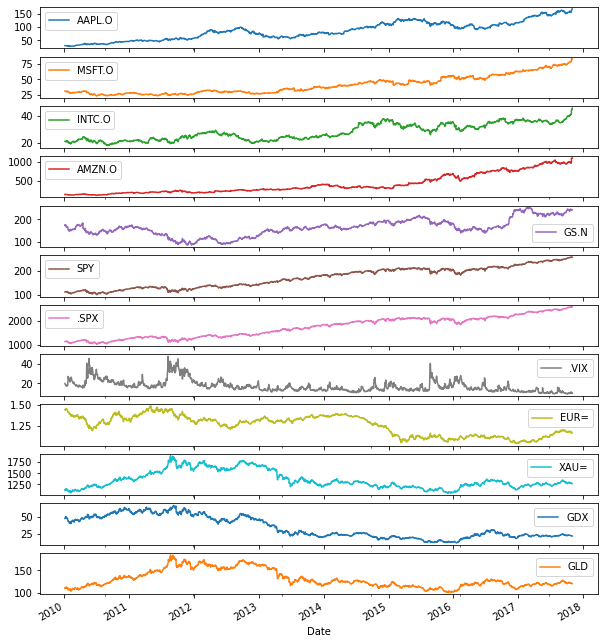

In [ ]:
#2. COMO ABRIR UN EXCEL (CSV) DESDE EL DRIVE



filename = '/content/drive/MyDrive/tr_eikon_eod_data.csv'
f = open(filename, 'r')
f.readlines()[:5]
data=pd.read_csv(filename, index_col=0,parse_dates=True)
data.info()
data.head()
data.tail()
data.plot(figsize=(10, 12), subplots=True); 

# Como las variables no tiene etiquetas, hago un diccionario
instruments=['Apple Stock', 'Microsoft Stock', 'Intel Stock', 'Amazon Stock', 'Goldman Sachs Stock', 'SPDR S&P 500 ETF Trust', 'S&P 500 Index', 'VIX Volatility Index', 'EUR/USD Exchange Rate', 'Gold Price', 'VanEck Vectors Gold', 'Miners ETF', 'SPDR Gold Trust']

for ric, name in zip(data.columns, instruments):
    print('{:8s} | {}'.format(ric, name))

                     

In [ ]:
# CONSULTA EMPRESA ESPECIFICA EN CHILE
#IPSA" SP-IPSA.SN
empresa = 'AZUL-AZUL.SN'
consulta = pd.DataFrame(bursatil[empresa]).dropna()
consulta.plot(figsize=(10, 12), subplots=True); 


In [ ]:
# CONSULTA SECTOR ECONOMICO
filename = '/content/drive/MyDrive/finanzas/nemo.csv'
data = pd.read_csv(filename)

consulta = pd.DataFrame(bursatil[empresa]).dropna()
bursatil_sector = pd.DataFrame(data.loc[df['Sector'] == 'Fishing']).dropna()  

# Create an empty list 
Row_list =[] 

# Iterate over each row 
for index, rows in bursatil_sector.iterrows(): 
	# Create list for the current row 
	my_list =rows.nemo 
	
	# append the list to the final list 
	Row_list.append(my_list) 


end = date.today()
beg = end - relativedelta(years = 20)
bursatil_sectorial = pd.DataFrame(yf.download(Row_list, start=beg, end=end)['Adj Close']) # me interesa el valor cierre

bursatil_sectorial.plot(figsize=(10, 12), subplots=True);

In [ ]:
#3. ANALISIS ESTADISTICO CON DATOS (BASICO)
bursatil_sectorial.info()
bursatil_sectorial.describe().round(2) #general
bursatil_sectorial.mean() # solo medias
bursatil_sectorial.aggregate([min, np.mean, np.std, np.median, max]).round(2) #consulta personalizada
bursatil_sectorial.diff().head() #diferencias absolutas
bursatil_sectorial.pct_change().round(3).head()  #growth rates
bursatil_sectorial.pct_change().mean().plot(kind='bar', figsize=(10, 6)); #grafico

rets = np.log(bursatil_sectorial / bursatil_sectorial.shift(1))
rets.cumsum().apply(np.exp).plot(figsize=(10, 6)); #  cumulative log returns over time

#resampling (daily -> weekly)
bursatil_sectorial.resample('1m', label='right').last().head() 

rets.cumsum().apply(np.exp).resample('1m', label='right').mean().plot(figsize=(10, 6));

In [ ]:
#4. SELECCION SERIES ESPECIFICAS DE LA BASE DE DATOS
# Ejemplo: Amazon (AMZN.O)

sym = 'AMZN.O'
data = pd.DataFrame(data[sym]).dropna()
data.tail()


In [ ]:
#5. ROLLING STATISTICS 

window=20 
data['mean']=data[sym].rolling(window=window).mean() # Mean
data['+2*std']=data['mean']+2*data[sym].rolling(window=window).std()
data['-2*std']=data['mean']-2*data[sym].rolling(window=window).std()

data['SMA1'] = data[sym].rolling(window=42).mean() #moving average

ax = data[['+2*std', '-2*std', 'mean', 'SMA1']].iloc[-200:].plot(
    figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)  
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);  
# plt.savefig('../../images/ch08/fts_05.png');

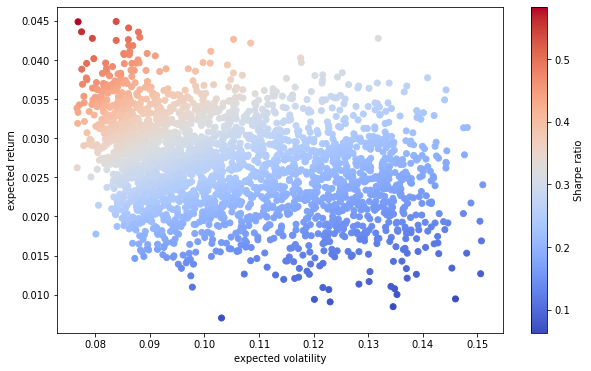

In [ ]:
# OPTIMIZACION DE PORTFOLIOS
symbols=nemo
noa = len(symbols)
data = bursatil[symbols]
rets = np.log(data / data.shift(1))
#rets.hist(bins=40, figsize=(10, 8));
rets.mean() * 252
rets.cov() * 252

weights = np.random.random(noa)  
weights /= np.sum(weights)
weights
weights.sum()
np.sum(rets.mean() * weights) * 252

np.dot(weights.T, np.dot(rets.cov() * 252, weights))

math.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

def port_ret(weights):
    return np.sum(rets.mean() * weights) * 252
    
def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

prets = []
pvols = []
for p in range (2500):  
    weights = np.random.random(noa)  
    weights /= np.sum(weights)  
    prets.append(port_ret(weights))  
    pvols.append(port_vol(weights))  
prets = np.array(prets)
pvols = np.array(pvols)


plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='o', cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio');
